<a href="https://colab.research.google.com/github/teoz97/DL_final/blob/master/DP_Final_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***LOAD LIBRARIES***

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Activation,Convolution3D,MaxPooling3D,Flatten,Dropout
from keras.utils import np_utils
from numpy.random import seed
import random as r
from time import time
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


***LOAD AND NORMALIZE***

In [2]:
Start=time()
(xtrain, ytrain),(xtest, ytest)=cifar10.load_data()
xtrain=xtrain.astype('float32')/255
xtest=xtest.astype('float32')/255
np.shape(xtrain)
np.shape(ytrain)
np.shape(xtest)
np.shape(ytest)
print("the dimesions of xtrain are: "+str(np.shape(xtrain))+"\nthe dimesions of ytrain are: " +str(np.shape(ytrain))+"\nthe dimesions of xtest are: " +str(np.shape(xtest))+"\nthe dimesions of ytest are: " +str(np.shape(ytest)))

170500096/170498071 [==============================] - 6s 0us/step
the dimesions of xtrain are: (50000, 32, 32, 3)
the dimesions of ytrain are: (50000, 1)
the dimesions of xtest are: (10000, 32, 32, 3)
the dimesions of ytest are: (10000, 1)


***SHOW IMAGE***

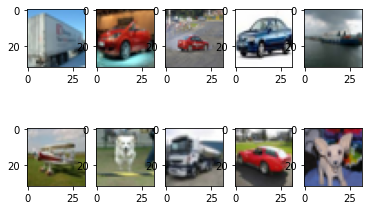

In [3]:
cont=15
for j in range(1,11,1):
    plt.subplot(2,5,j)
    plt.imshow(xtrain[cont])
    cont+=30 
      

***RESHAPE AND TARGET***

In [4]:
Xtrain=xtrain.reshape(50000, 32, 32,3,1)
Xtest=xtest.reshape(10000, 32, 32,3,1)
Ytrain=np_utils.to_categorical(ytrain,10)
Ytest=np_utils.to_categorical(ytest,10)
i=r.randint(1,50000)
print(Xtrain.shape)
print(Ytrain.shape)
print(Ytrain[i])

(50000, 32, 32, 3, 1)
(50000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


***MODEL***

In [7]:
model=Sequential()  
model.add(Convolution3D(filters=32,kernel_size=(3,3,1),input_shape=Xtrain.shape[1:],activation='relu'))
model.add(Convolution3D(filters=32,kernel_size=(3,3,1),activation='relu', strides=(1, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))

model.add(Convolution3D(filters=12,kernel_size=(3,3,1),activation='relu', strides=(1, 1, 1)))
model.add(Convolution3D(filters=12,kernel_size=(3,3,1),activation='relu', strides=(1, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))

model.add(Flatten())
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 30, 30, 3, 54)     540       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 28, 28, 3, 54)     26298     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 14, 14, 3, 54)     0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 12, 12, 3, 96)     46752     
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 10, 10, 3, 96)     83040     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 5, 5, 3, 96)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)             

***FIT AND FINISH TIME***

In [8]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adadelta')
model.fit(Xtrain,Ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=1)
score=model.evaluate(Xtest,Ytest,verbose=1)
print('Test of Accuracy',score[1])

Finish=time()
Time=Finish-Start
print('The Time was: ',Time)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 31s 764us/step - loss: 1.8256 - accuracy: 0.3318 - val_loss: 1.5868 - val_accuracy: 0.4170
Epoch 2/20
40000/40000 [==============================] - 23s 584us/step - loss: 1.3898 - accuracy: 0.5050 - val_loss: 1.2671 - val_accuracy: 0.5496
Epoch 3/20
40000/40000 [==============================] - 24s 593us/step - loss: 1.1270 - accuracy: 0.6072 - val_loss: 1.1351 - val_accuracy: 0.6028
Epoch 4/20
40000/40000 [==============================] - 24s 600us/step - loss: 0.9232 - accuracy: 0.6816 - val_loss: 0.9322 - val_accuracy: 0.6789
Epoch 5/20
40000/40000 [==============================] - 24s 605us/step - loss: 0.7635 - accuracy: 0.7365 - val_loss: 0.9132 - val_accuracy: 0.6885
Epoch 6/20
40000/40000 [==============================] - 24s 612us/step - loss: 0.6308 - accuracy: 0.7831 - val_loss: 0.8385 - val_accuracy: 0.7194
Epoch 7/20
40000/40000 [==============================] 

***LOAD IMAGE TEST***

In [9]:
from PIL import Image as im
from PIL import ImageFile
from google.colab import files as f
ImageFile.LOAD_TRUNCATED_IMAGE = True

uploaded=f.upload()

Saving 0.jpg to 0.jpg


***RANDOM IMAGE***

(32, 32, 3)


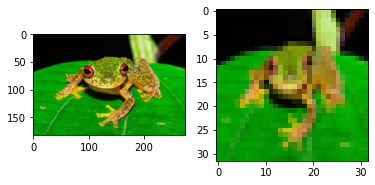

In [10]:
pic=str(r.randint(0,9))+'.jpg'
Image=im.open(pic)
plt.subplot(1,2,1)
plt.imshow(Image)
Image=Image.resize((32,32))
Image=np.array(Image)
print(np.shape(Image))
plt.subplot(1,2,2)
plt.imshow(Image)

***RESULT***

In [11]:
Img=Image.reshape(1,32,32,3,1)
img=Img.astype('float32')/255
result=model.predict_classes(img)
result[0]

6